In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as snspip 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

## Dataset

In [4]:
nama_file = 'registrasi3.xlsx'
dataset = pd.read_excel(nama_file)
print(dataset)

     Umur  SHIFT Jenis Pasien Jenis Pemeriksaan Detil Pemeriksaan  \
0      48   PAGI         BARU               USG    ABD ATAS BAWAH   
1      54   PAGI         BARU               USG    ABD ATAS BAWAH   
2      51   PAGI         BARU           RONTGEN            THORAX   
3      53   PAGI         BARU               USG    ABD ATAS BAWAH   
4      55   PAGI         BARU               USG    ABD ATAS BAWAH   
..    ...    ...          ...               ...               ...   
110    23   SORE         BARU           RONTGEN            THORAX   
111    23   SORE         BARU           RONTGEN               BOF   
112    72  MALAM         BARU           CT SCAN            KEPALA   
113     5   SORE         BARU           RONTGEN            THORAX   
114    13  MALAM         BARU           RONTGEN            THORAX   

    Jenis Pembayaran  Waktu Tunggu   
0                IKS             24  
1                KES             24  
2                IKS             20  
3               UMU

### Ordinal to Rasio

In [5]:
# Mengubah data menjad bentuk numerik
dataset['SHIFT'].replace({'':0, 'PAGI':1, 'SORE':2, 'MALAM':3}, inplace=True)
dataset['Jenis Pasien'].replace({'':0, 'BARU':1, 'LAMA':2}, inplace=True)
dataset['Jenis Pemeriksaan'].replace({'':0, 'USG':1, 'RONTGEN':2, 'CT SCAN':3}, inplace=True)
dataset['Detil Pemeriksaan'].replace({'':0, 'ABD ATAS BAWAH':1, 'THORAX':2, 'GENU':3, 'KONTROL HAMIL':4, 'THORAX':5, 'MANUS':6, 'ELBOW':7, 'THYROID':8, 'KANDUNGAN':9, 'LS':10, 'CRURIS':11, 'PEDIS':12, 'PELVIS':13, 'KEPALA':14, 'WRIST':15, 'COCCYGEUS':16, 'TVS':17, 'STONO':18, 'BOF':19}, inplace=True)
dataset['Jenis Pembayaran'].replace({'':0, 'IKS':1, 'UMUM':2, 'KES':3}, inplace=True)

dataset


,Umur,SHIFT,Jenis Pasien,Jenis Pemeriksaan,Detil Pemeriksaan,Jenis Pembayaran,Waktu Tunggu
0,48,1,1,1,1,1,24
1,54,1,1,1,1,3,24
2,51,1,1,2,5,1,20
3,53,1,1,1,1,2,23
4,55,1,1,1,1,3,23
...,...,...,...,...,...,...,...
110,23,2,1,2,5,3,32
111,23,2,1,2,19,2,28
112,72,3,1,3,14,2,44
113,5,2,1,2,5,2,36


### Missing value

In [6]:
# # Mendeteksi missing value
# if dataset.isna().values.any():
#     print("Missing value:\n")
#     print(dataset.isna().any())
# else:
#     print("tidak ada missing value\n")
# print("")
dataset.isnull().sum()

Umur                 0
SHIFT                0
Jenis Pasien         0
Jenis Pemeriksaan    0
Detil Pemeriksaan    0
Jenis Pembayaran     0
Waktu Tunggu         0
dtype: int64

#### Replace missing value with mean

In [7]:
# Mengganti dataset rata-rata
mean = dataset.mean()
missingValue = dataset.fillna(mean)
missingValue

,Umur,SHIFT,Jenis Pasien,Jenis Pemeriksaan,Detil Pemeriksaan,Jenis Pembayaran,Waktu Tunggu
0,48,1,1,1,1,1,24
1,54,1,1,1,1,3,24
2,51,1,1,2,5,1,20
3,53,1,1,1,1,2,23
4,55,1,1,1,1,3,23
...,...,...,...,...,...,...,...
110,23,2,1,2,5,3,32
111,23,2,1,2,19,2,28
112,72,3,1,3,14,2,44
113,5,2,1,2,5,2,36


### Outlier

In [8]:
# Mendeteksi outlier dengan Quartiles
dataset = dataset
def outlierDetection(dataset):
    q1 = dataset.quantile(0.25)
    q3 = dataset.quantile(0.75)
    iqr = q3 - q1
    outlier = dataset[((dataset < (q1 - 1.5 * iqr)) | (dataset > (q3 + 1.5 * iqr)))]
    return outlier
print("") 

# Mendeteksi outlier
outlier = outlierDetection(missingValue)
if not outlier.empty:
    print("Outlier:\n")
    print(outlier)
else:
    print("Tidak ada outlier\n")
print("")




Outlier:

     Umur  SHIFT  Jenis Pasien  Jenis Pemeriksaan  Detil Pemeriksaan  \
0     NaN    NaN           NaN                1.0                1.0   
1     NaN    NaN           NaN                1.0                1.0   
2     NaN    NaN           NaN                NaN                NaN   
3     NaN    NaN           NaN                1.0                1.0   
4     NaN    NaN           NaN                1.0                1.0   
..    ...    ...           ...                ...                ...   
110   NaN    NaN           NaN                NaN                NaN   
111   NaN    NaN           NaN                NaN               19.0   
112   NaN    NaN           NaN                3.0               14.0   
113   NaN    NaN           NaN                NaN                NaN   
114   NaN    NaN           NaN                NaN                NaN   

     Jenis Pembayaran  Waktu Tunggu   
0                 NaN            NaN  
1                 NaN            NaN  
2      

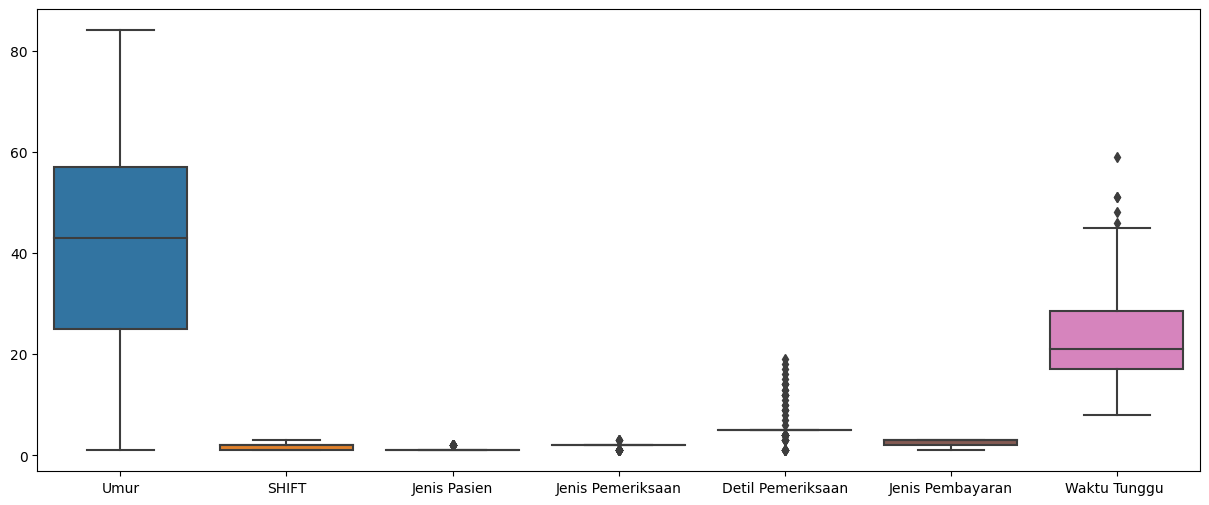

In [9]:
# Deteksi outlier dengan gambar 
plt.figure(figsize=(15, 6))  # Ukuran gambar dapat disesuaikan
sns.boxplot(dataset)
plt.show()

#### Replace outlier with mean

In [10]:
# Mengganti outlier dengan nilai mean
def outlierReplacing(dataset):
    q1 = dataset.quantile(0.25)
    q3 = dataset.quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    mean = dataset[(dataset > lower_bound) & (dataset < upper_bound)].mean()
    dataset[dataset > upper_bound] = mean
    dataset[dataset < lower_bound] = mean
    return dataset
print("")

# Membuat dataframe untuk menampung hasil penggantian outlier
dataset = pd.DataFrame(dataset)
print("Replaced Outliers Data")
print(dataset.head)


Replaced Outliers Data
<bound method NDFrame.head of      Umur  SHIFT  Jenis Pasien  Jenis Pemeriksaan  Detil Pemeriksaan  \
0      48      1             1                  1                  1   
1      54      1             1                  1                  1   
2      51      1             1                  2                  5   
3      53      1             1                  1                  1   
4      55      1             1                  1                  1   
..    ...    ...           ...                ...                ...   
110    23      2             1                  2                  5   
111    23      2             1                  2                 19   
112    72      3             1                  3                 14   
113     5      2             1                  2                  5   
114    13      3             1                  2                  5   

     Jenis Pembayaran  Waktu Tunggu   
0                   1             24  
1  

### Scatterplot

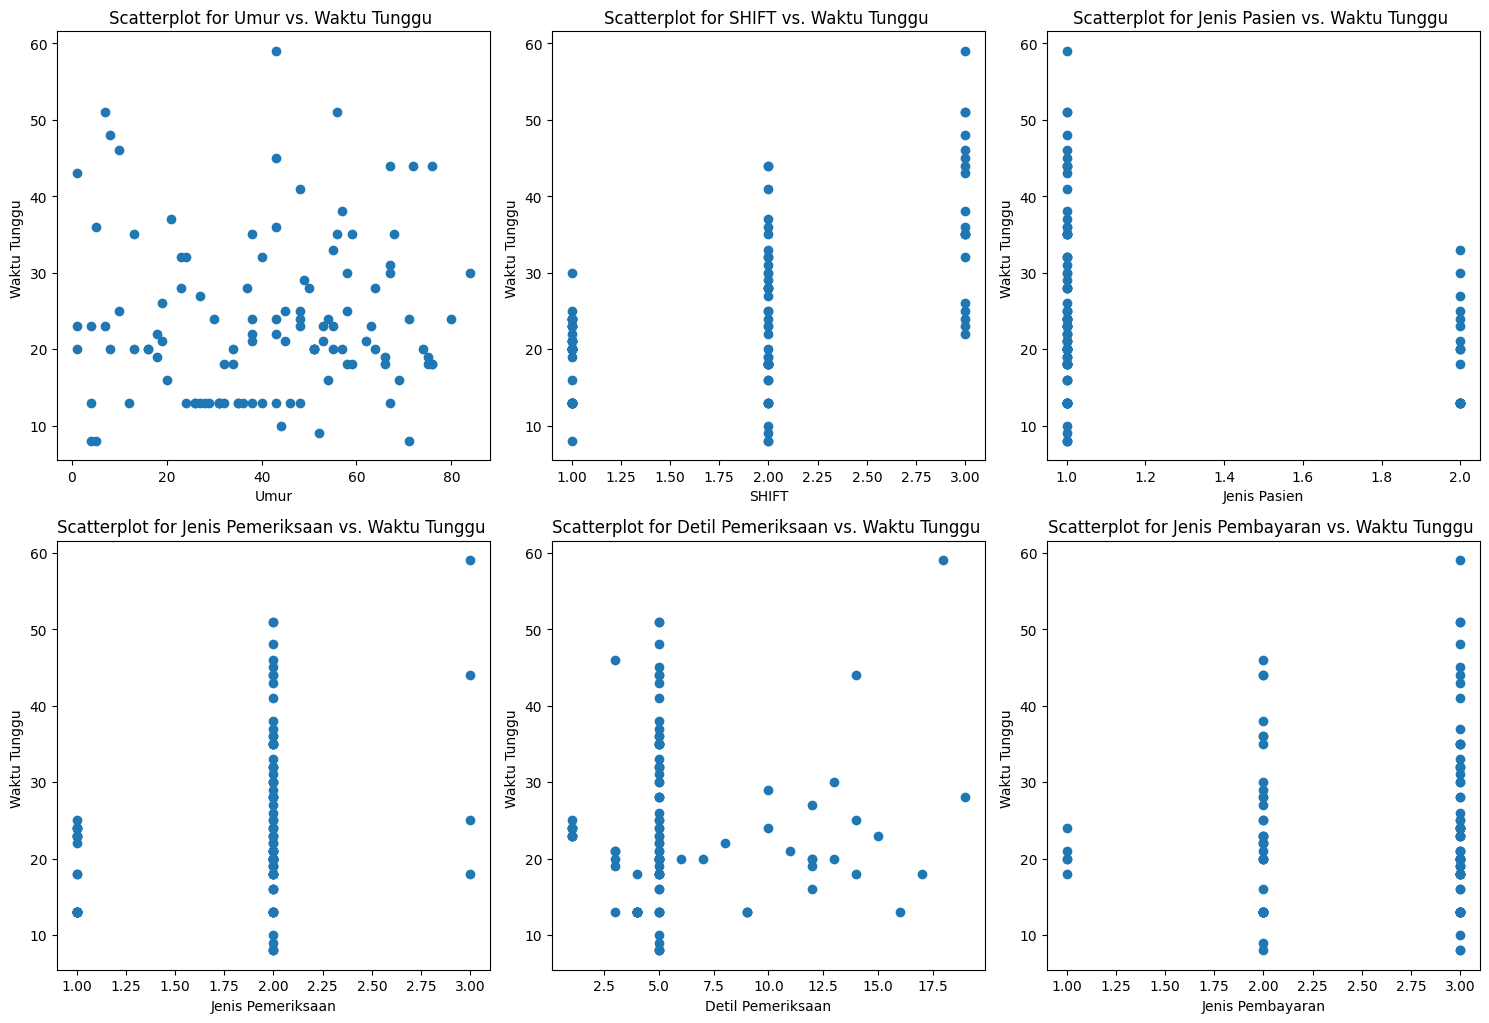

In [11]:
# Define the output variable
output_variable = "Waktu Tunggu "

num_input_variables = len(dataset.columns) - 1
grid_size = int(num_input_variables**0.5) + 1  
fig, axes = plt.subplots(nrows=grid_size, ncols=grid_size, figsize=(15, 15))
axes = axes.flatten()

# Scatterplots for each input variable vs. the output variable
for i, column in enumerate(dataset.columns):
    if column != output_variable:
        ax = axes[i]
        ax.scatter(dataset[column], dataset[output_variable])
        ax.set_title(f"Scatterplot for {column} vs. {output_variable}")
        ax.set_xlabel(column)
        ax.set_ylabel(output_variable)


for i in range(num_input_variables, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Heatmap

<Axes: >

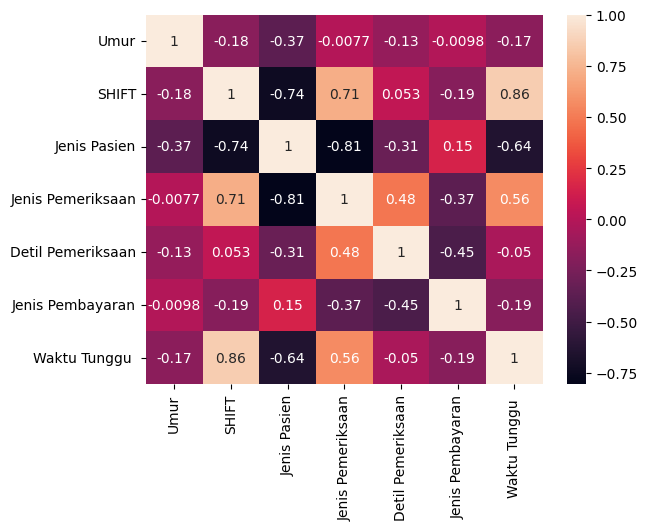

In [12]:
# Visualisasi dengan HeatMap 
dfHeat = dataset
dfHeat = dfHeat.corr()
sns.heatmap(dfHeat.corr(), annot=True)

### Line Graph

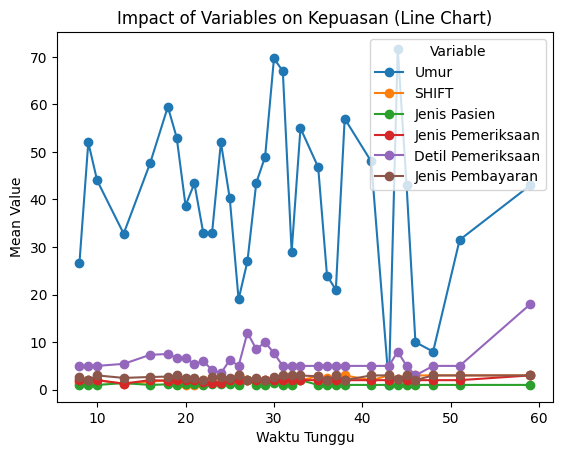

In [13]:
# Create a line chart to compare the impact of variables on "Waktu Tunggu"
data_grouped = dataset.groupby("Waktu Tunggu ").mean()
data_grouped.plot(kind="line", marker="o")
plt.title("Impact of Variables on Kepuasan (Line Chart)")
plt.xlabel("Waktu Tunggu")
plt.ylabel("Mean Value")
plt.xticks(rotation=0)
plt.legend(title="Variable")
plt.show() 

### Histogram Average

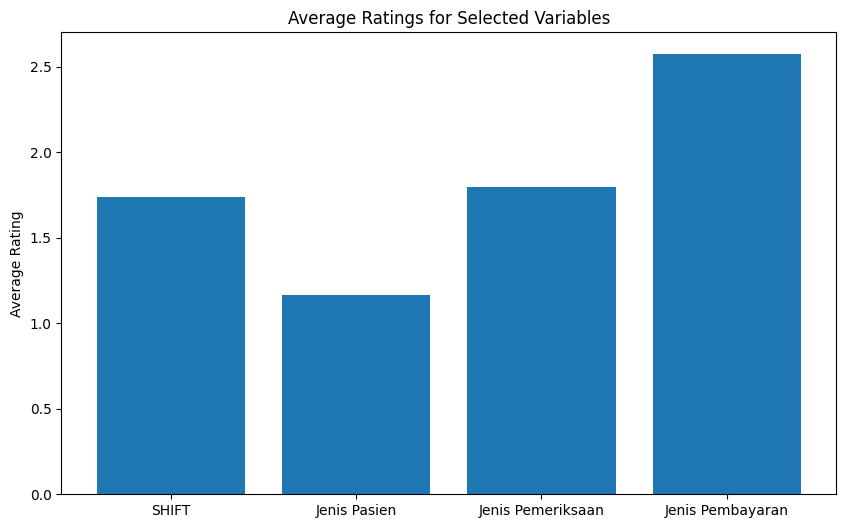

In [14]:
# Select the relevant columns
selected_columns = ["SHIFT", "Jenis Pasien", "Jenis Pemeriksaan", "Jenis Pembayaran", "Waktu Tunggu "]
data = dataset[selected_columns]

# Define a list of labels for the selected variables
labels = selected_columns[:-1]  # Excluding 'kepuasan'

# 2D Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(labels, data.mean()[:-1])
plt.title("Average Ratings for Selected Variables")
plt.ylabel("Average Rating")
plt.show()

### Visualisasi DIagram 2 Dimensi

#### Shift dan Waktu Tunggu

In [15]:
# Menggabungkan data

data_gabungan = {
    'SHIFT': [],
    'Waktu Tunggu': []
}

# Pilih dua kolom yang ingin Anda visualisasikan
Waktu_tunggu = dataset['Waktu Tunggu ']
jenis_pemeriksaan = dataset['SHIFT']

Waktu = jenis_pemeriksaan.unique()

for Waktu_val in Waktu:
    data_gabungan['SHIFT'].append(Waktu_val)
    data_gabungan['Waktu Tunggu'].append(Waktu_tunggu[jenis_pemeriksaan == Waktu_val].mean())

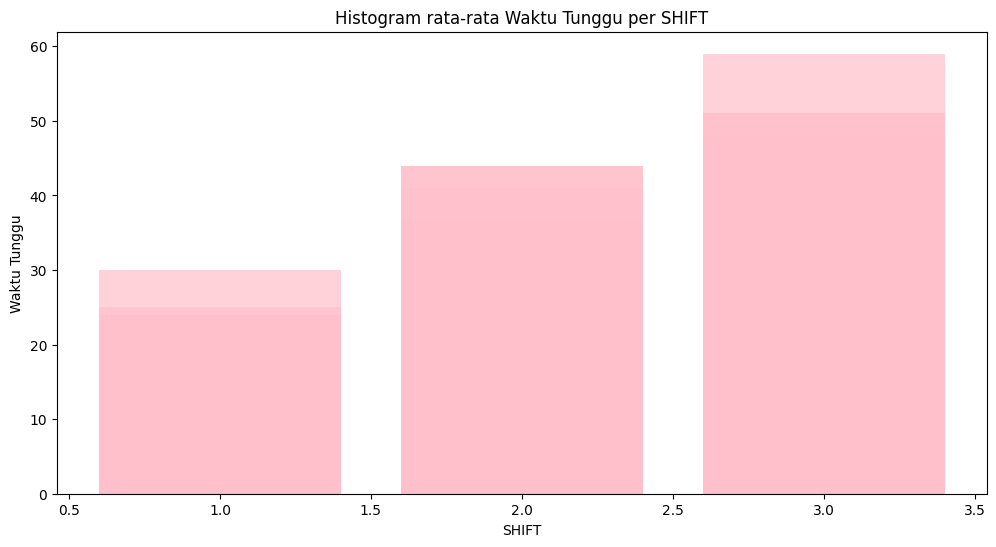

In [16]:
# Membuat histogram dengan Waktu pada sumbu x dan Waktu tunggu pada sumbu y
plt.figure(figsize=(12, 6))
plt.bar(dataset['SHIFT'], dataset['Waktu Tunggu '], color='pink', alpha=0.7)

# Menambahkan label sumbu dan judul
plt.xlabel('SHIFT')
plt.ylabel('Waktu Tunggu')
plt.title('Histogram rata-rata Waktu Tunggu per SHIFT')

plt.show()

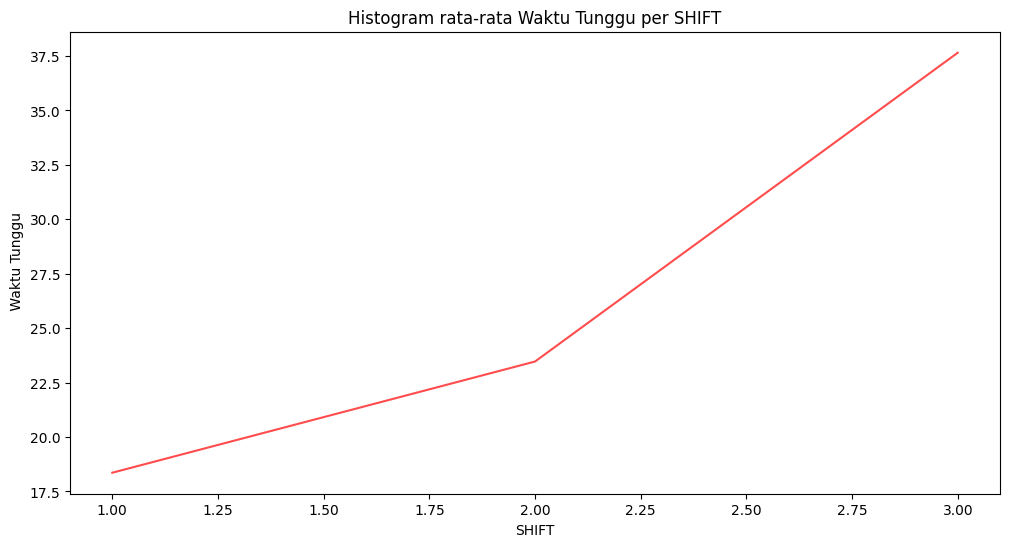

In [17]:
# Membuat diagram garis dengan Waktu pada sumbu x dan Waktu tunggu pada sumbu y
plt.figure(figsize=(12, 6))
plt.plot(data_gabungan['SHIFT'], data_gabungan['Waktu Tunggu'], color='red', alpha=0.7)

# Menambahkan label sumbu dan judul
plt.xlabel('SHIFT')
plt.ylabel(' Waktu Tunggu')
plt.title('Histogram rata-rata Waktu Tunggu per SHIFT')

plt.show()

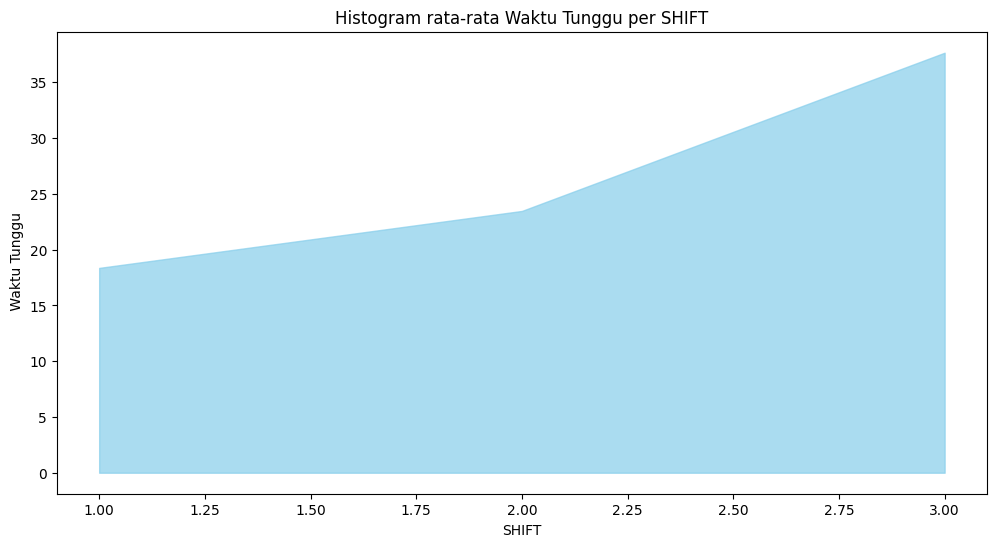

In [18]:
# Membuat diagram area dengan Waktu pada sumbu x dan Waktu tunggu pada sumbu y
plt.figure(figsize=(12, 6))
plt.fill_between(data_gabungan['SHIFT'], data_gabungan['Waktu Tunggu'], color='skyblue', alpha=0.7)

# Menambahkan label sumbu dan judul
plt.xlabel('SHIFT')
plt.ylabel(' Waktu Tunggu')
plt.title('Histogram rata-rata Waktu Tunggu per SHIFT')

plt.show()

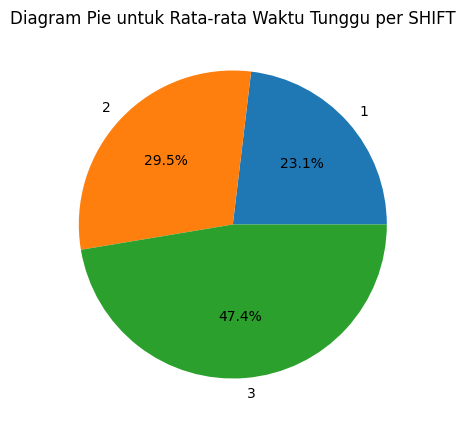

In [19]:
#PIE
data_grouped = dataset.groupby('SHIFT')['Waktu Tunggu '].mean().reset_index()

# Membuat diagram pie dengan SHIFT yang unik dan rata-rata Waktu tunggu
labels = data_grouped['SHIFT']
values = data_grouped['Waktu Tunggu ']

plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Diagram Pie untuk Rata-rata Waktu Tunggu per SHIFT')
plt.show()

#### Jenis Pemeriksaan dan Waktu Tunggu

In [20]:
# Gabungan data
data_gabungan = {
    'Jenis Pemeriksaan': [],
    'Waktu Tunggu': []
}

# Pilih dua kolom yang ingin Anda visualisasikan
Waktu_tunggu = dataset['Waktu Tunggu ']
jenis_pemeriksaan = dataset['Jenis Pemeriksaan']

Waktu = jenis_pemeriksaan.unique()

for Waktu_val in Waktu:
    data_gabungan['Jenis Pemeriksaan'].append(Waktu_val)
    data_gabungan['Waktu Tunggu'].append(Waktu_tunggu[jenis_pemeriksaan == Waktu_val].mean())

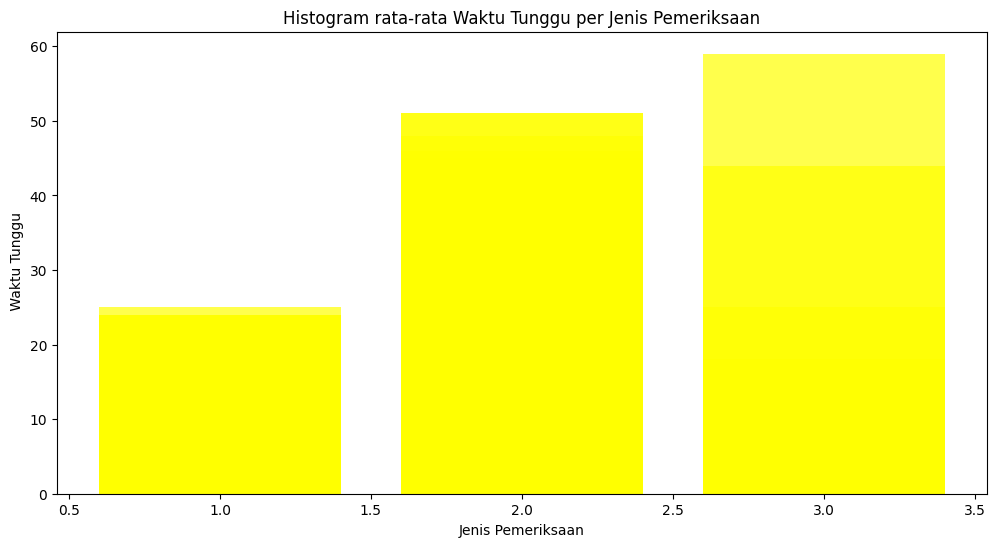

In [21]:
# Membuat histogram dengan Waktuda sumbu x dan Waktu tunggu pada sumbu y
plt.figure(figsize=(12, 6))
plt.bar(dataset['Jenis Pemeriksaan'], dataset['Waktu Tunggu '], color='yellow', alpha=0.7)

# Menambahkan label sumbu dan judul
plt.xlabel('Jenis Pemeriksaan')
plt.ylabel(' Waktu Tunggu')
plt.title('Histogram rata-rata Waktu Tunggu per Jenis Pemeriksaan')

plt.show()

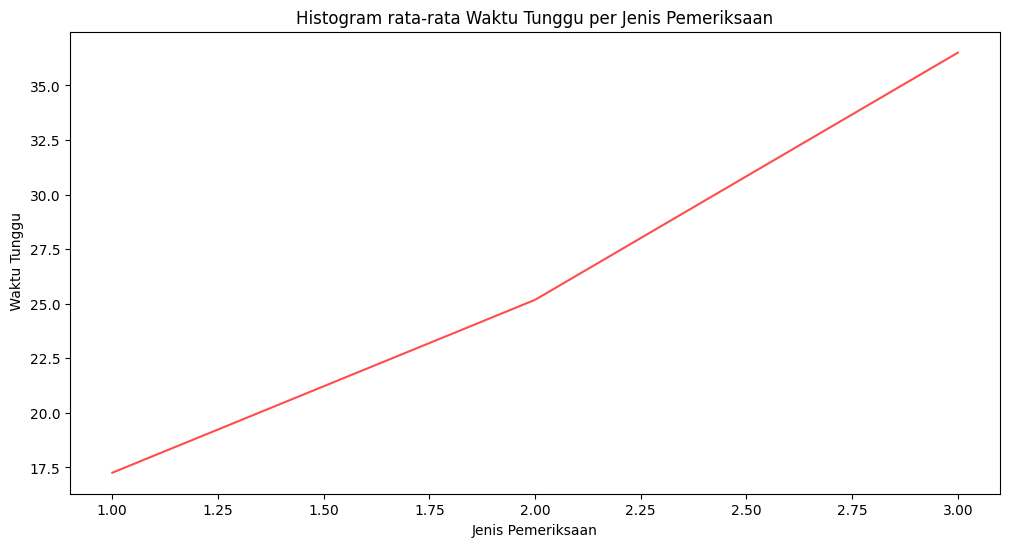

In [22]:
# Membuat diagram garis dengan Waktu pada sumbu x dan Waktu tunggu pada sumbu y
plt.figure(figsize=(12, 6))
plt.plot(data_gabungan['Jenis Pemeriksaan'], data_gabungan['Waktu Tunggu'], color='red', alpha=0.7)

# Menambahkan label sumbu dan judul
plt.xlabel('Jenis Pemeriksaan')
plt.ylabel(' Waktu Tunggu')
plt.title('Histogram rata-rata Waktu Tunggu per Jenis Pemeriksaan')

plt.show()

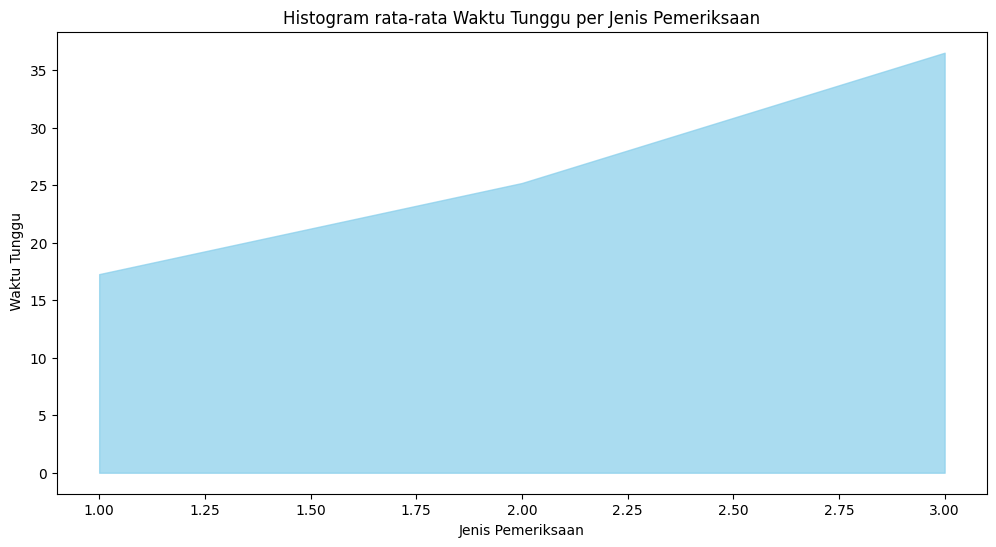

In [23]:
# Membuat diagram area dengan Waktuda sumbu x dan KatWaktunggu pada sumbu y
plt.figure(figsize=(12, 6))
plt.fill_between(data_gabungan['Jenis Pemeriksaan'], data_gabungan['Waktu Tunggu'], color='skyblue', alpha=0.7)

# Menambahkan label sumbu dan judul
plt.xlabel('Jenis Pemeriksaan')
plt.ylabel(' Waktu Tunggu')
plt.title('Histogram rata-rata Waktu Tunggu per Jenis Pemeriksaan')

plt.show()

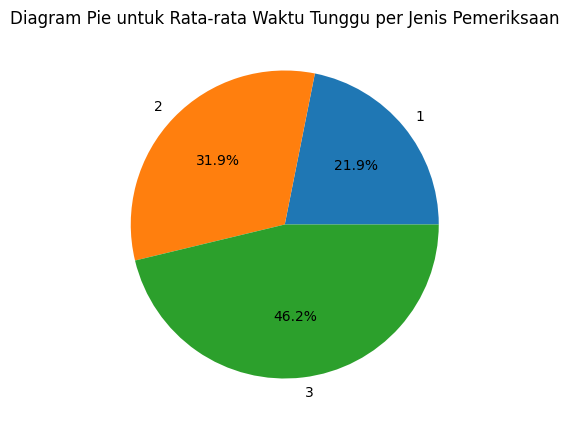

In [24]:
#PIE
data_grouped = dataset.groupby('Jenis Pemeriksaan')['Waktu Tunggu '].mean().reset_index()

# Membuat diagram pie dengan Jenis Pemeriksaan yang unik dan rata-rata Waktu tunggu
labels = data_grouped['Jenis Pemeriksaan']
values = data_grouped['Waktu Tunggu ']

plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Diagram Pie untuk Rata-rata Waktu Tunggu per Jenis Pemeriksaan')
plt.show()


#### Jenis Pasien dan Waktu Pemeriksaan

In [25]:
# gabungan data
data_gabungan = {
    'Jenis Pasien': [],
    'Waktu Tunggu': []
}

# Pilih dua kolom yang ingin Anda visualisasikan
Waktu_tunggu = dataset['Waktu Tunggu ']
jenis_pemeriksaan = dataset['Jenis Pasien']

Waktu = jenis_pemeriksaan.unique()

for Waktu_val in Waktu:
    data_gabungan['Jenis Pasien'].append(Waktu_val)
    data_gabungan['Waktu Tunggu'].append(Waktu_tunggu[jenis_pemeriksaan == Waktu_val].mean())

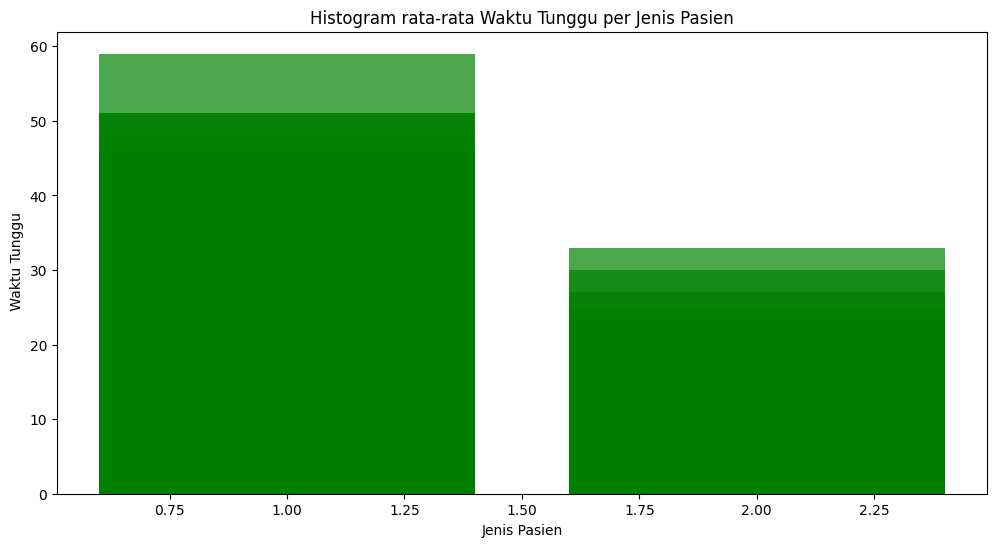

In [26]:
# Membuat histogram dengan Waktu pada sumbu x dan Waktu tunggu pada sumbu y
plt.figure(figsize=(12, 6))
plt.bar(dataset['Jenis Pasien'], dataset['Waktu Tunggu '], color='green', alpha=0.7)

# Menambahkan label sumbu dan judul
plt.xlabel('Jenis Pasien')
plt.ylabel(' Waktu Tunggu')
plt.title('Histogram rata-rata Waktu Tunggu per Jenis Pasien')

plt.show()

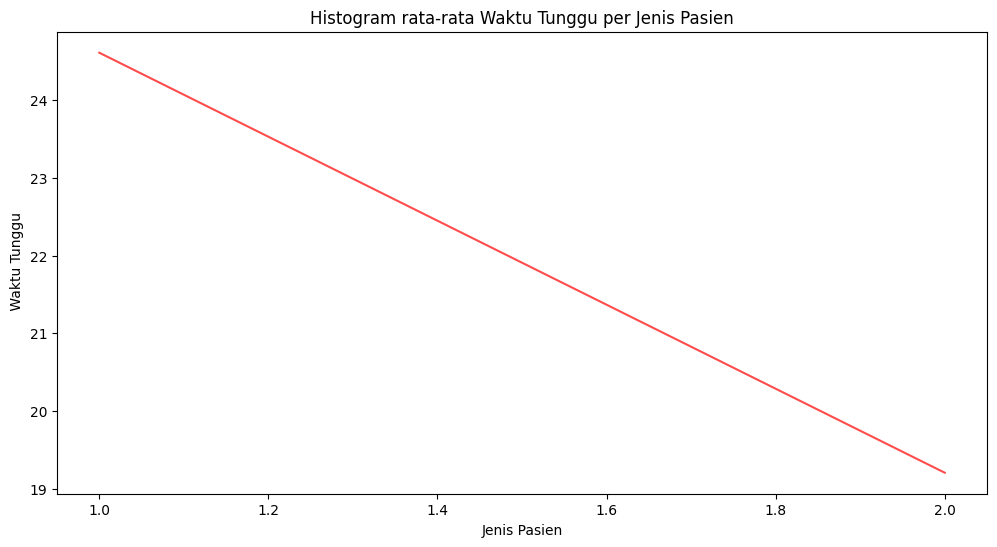

In [27]:
# Membuat diagram garis dengan Waktu pada sumbu x dan Waktu tunggu pada sumbu y
plt.figure(figsize=(12, 6))
plt.plot(data_gabungan['Jenis Pasien'], data_gabungan['Waktu Tunggu'], color='red', alpha=0.7)

# Menambahkan label sumbu dan judul
plt.xlabel('Jenis Pasien')
plt.ylabel(' Waktu Tunggu')
plt.title('Histogram rata-rata Waktu Tunggu per Jenis Pasien')

plt.show()

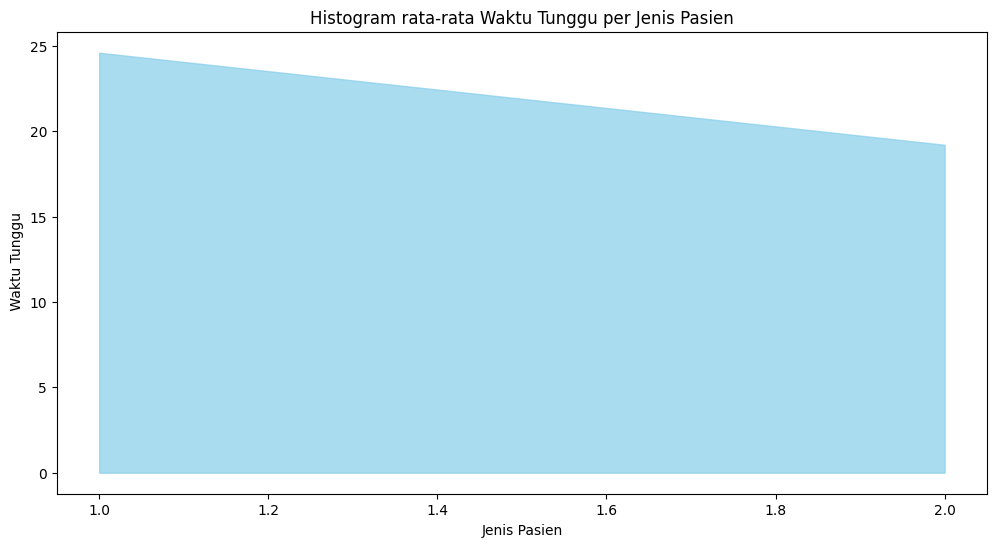

In [28]:
# Membuat diagram area dengan Waktu pada sumbu x dan Waktu tunggu pada sumbu y
plt.figure(figsize=(12, 6))
plt.fill_between(data_gabungan['Jenis Pasien'], data_gabungan['Waktu Tunggu'], color='skyblue', alpha=0.7)

# Menambahkan label sumbu dan judul
plt.xlabel('Jenis Pasien')
plt.ylabel(' Waktu Tunggu')
plt.title('Histogram rata-rata Waktu Tunggu per Jenis Pasien')

plt.show()

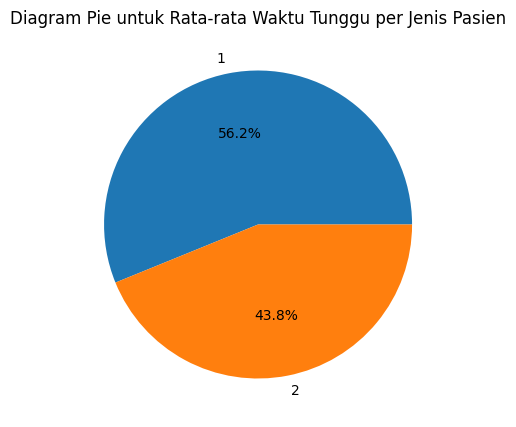

In [29]:
#PIE
data_grouped = dataset.groupby('Jenis Pasien')['Waktu Tunggu '].mean().reset_index()

# Membuat diagram pie dengan Jenis Pasien yang unik dan rata-rata Waktu tunggu
labels = data_grouped['Jenis Pasien']
values = data_grouped['Waktu Tunggu ']

plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Diagram Pie untuk Rata-rata Waktu Tunggu per Jenis Pasien')
plt.show()


### Visualisasi High Dimensional

#### Area

Text(0.5, 0.92, '3D Area Chart Jenis Pemeriksaan dan SHIFT')

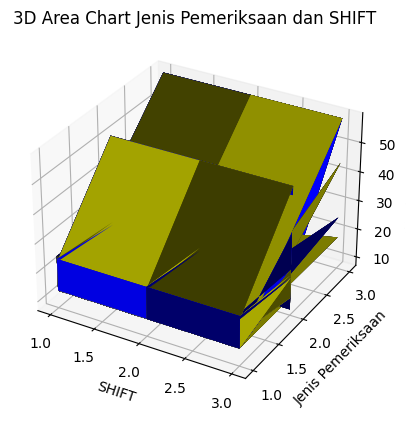

In [30]:
#3D Area
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import LinearLocator

ax = plt.figure().add_subplot(projection='3d')

# Make data.
X = dataset["SHIFT"]
xlen = len(X)
Y = dataset["Jenis Pemeriksaan"]
ylen = len(Y)
X, Y = np.meshgrid(X, Y)
Z = np.outer(dataset["Waktu Tunggu "], np.ones(len(dataset["Waktu Tunggu "])))

# Create an empty array of strings with the same shape as the meshgrid, and
# populate it with two colors in a checkerboard pattern.
colortuple = ('y', 'b')
colors = np.empty(X.shape, dtype=str)
for y in range(ylen):
    for x in range(xlen):
        colors[y, x] = colortuple[(x + y) % len(colortuple)]

# Plot the surface with face colors taken from the array we made.
surf = ax.plot_surface(X, Y, Z, facecolors=colors, linewidth=0)

# Menambahkan label sumbu dan judul
ax.set_xlabel('SHIFT')
ax.set_ylabel('Jenis Pemeriksaan')
ax.set_zlabel('Waktu Tunggu ')
ax.set_title('3D Area Chart Jenis Pemeriksaan dan SHIFT')



#### Multivariet PIE

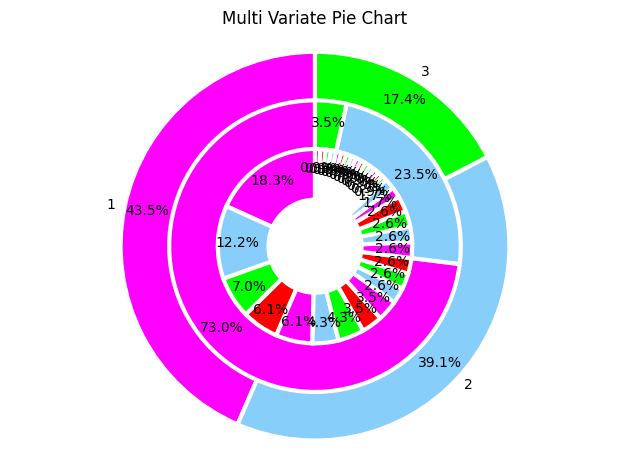

In [31]:
#Multivariet PIE

x1 = dataset["SHIFT"].value_counts()
x2 = dataset["Jenis Pemeriksaan"].value_counts()
x3 = dataset["Waktu Tunggu "].value_counts()

colors = ['magenta', 'lightskyblue', 'lime', 'red']

plt.pie(x1, labels=dataset["SHIFT"].value_counts().index,startangle=90, colors=colors, pctdistance=0.88, autopct = '%1.1f%%', radius=1.0, labeldistance=1.05,  wedgeprops = { 'linewidth': 3, 'edgecolor' : "white"}) #draw a first Pie chart
plt.pie(x2, startangle=90, colors=colors,pctdistance=0.85, autopct = '%1.1f%%', radius=0.75,  wedgeprops = { 'linewidth': 3, 'edgecolor': "white"}) #draw a second Pie Chart
plt.pie(x3, startangle=90, pctdistance=0.8, autopct = '%1.1f%%', radius=0.5, colors=colors,  wedgeprops = { 'linewidth': 3, 'edgecolor': "white"}) #draw a third Pie Chart

center_circle = plt.Circle((0,0), 0.25, fc='white', )
plt.title('Multi Variate Pie Chart')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.axis('equal')
plt.tight_layout()
plt.show()

#### Barplot 3D

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (99,) and arg 5 with shape (51,).

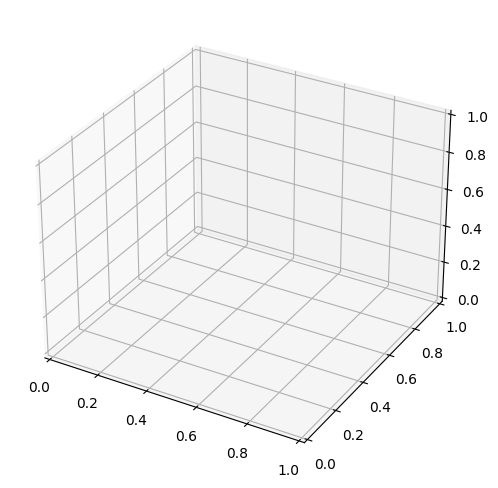

In [32]:
#3D BARPLOT

# Contoh dataset dengan dua variabel nominal dan satu variabel rasio
categories_nominal1 = dataset["Waktu Tunggu "].value_counts().index
categories_nominal2 = dataset["SHIFT"].value_counts().index
values_ratio = dataset[["Waktu Tunggu ", "SHIFT"]].value_counts().sort_values()

# Membuat objek subplot 3D
fig = plt.figure(figsize=(13, 6))
ax = fig.add_subplot(111, projection='3d')

# Menentukan posisi untuk setiap grup bar
bar_positions_x = np.arange(len(categories_nominal1))
bar_positions_y = np.arange(len(categories_nominal2))
bar_positions_x, bar_positions_y = np.meshgrid(bar_positions_x, bar_positions_y)

# Membuat bar chart 3D dengan dua variabel nominal dan satu variabel rasio
ax.bar3d(bar_positions_x.flatten(), bar_positions_y.flatten(), np.zeros_like(bar_positions_x).flatten(),
         dx=0.8, dy=0.8, dz=values_ratio * len(categories_nominal1), color='blue')

# Menambahkan label sumbu dan judul
ax.set_xlabel('Waktu Tunggu')
ax.set_ylabel('SHIFT')
ax.set_zlabel('Count')
ax.set_title('3D Bar Chart Jenis Pemeriksaan dan SHIFT')

# Menambahkan label untuk setiap grup
ax.set_xticks(np.arange(len(categories_nominal1)) + 0.4)
ax.set_xticklabels(categories_nominal1)
ax.set_yticks(np.arange(len(categories_nominal2)) + 0.4)
ax.set_yticklabels(categories_nominal2)

# Menampilkan plot
plt.show()

#### Scatterplot 3D

KeyError: 24

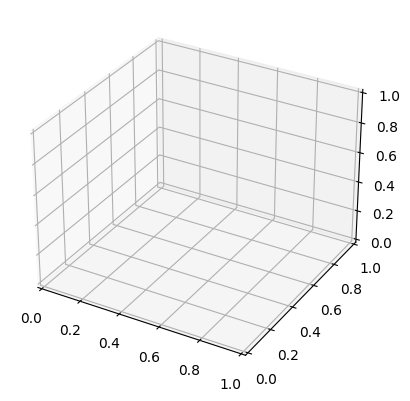

In [ ]:
#3D SCATTER PLOT

#Scatter Plot 3D

colors = {
    1: 'blue',
    2: 'green',
    3: 'yellow'
}

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    dataset["SHIFT"], dataset["Jenis Pemeriksaan"], dataset["Jenis Pasien"],
    c=[colors[kt] for kt in dataset["Waktu Tunggu "]], s=50
)

# Tambahkan penjelasan
handles = [plt.Line2D([0], [0], marker='o', color=color, label=f'Waktu Tunggu {kt}') for kt, color in colors.items()]
ax.legend(handles=handles, title='Waktu Tunggu')

ax.set_xlabel("SHIFT")
ax.set_ylabel("Jenis Pemeriksaan")
ax.set_zlabel("Jenis Pasien")
ax.set_title("Pengaruh jenis pemeriksaan, jenis pasien, dan SHIFT terhadap Waktu tunggu")

plt.show()

### Mengubah menjadi ordinal

In [ ]:
# Create a Pandas Series with interval data.
series = pd.Series(dataset['Waktu Tunggu '])

# Convert the interval data to ordinal data using the pd.cut() function with 3 bins.
ordinal_data = pd.cut(series, bins=[4, 21, 33, 59], labels=[0, 1, 2])
# Print the ordinal data.
print(ordinal_data)

0      1
1      1
2      0
3      1
4      1
      ..
110    1
111    1
112    2
113    2
114    0
Name: Waktu Tunggu , Length: 115, dtype: category
Categories (3, int64): [0 < 1 < 2]


#### Menggabungkan data

In [ ]:
dataset = dataset.assign(Range_Waktu_tunggu=ordinal_data)
print(dataset)

### Data Training

In [ ]:
X = dataset[['Jenis Pemeriksaan', 'SHIFT', 'Jenis Pasien']]
y = dataset[['Waktu Tunggu ']]

,Waktu Tunggu
0,24
1,24
2,20
3,23
4,23
...,...
110,32
111,28
112,44
113,36


#### Data Training dan Testing

In [ ]:
data_from_A =dataset['Waktu Tunggu '].iloc[:30]
print(data_from_A)

<bound method NDFrame.head of 0     24
1     24
2     20
3     23
4     23
5     21
6     24
7     13
8     13
9     13
10    13
11     8
12    18
13     8
14     8
15    13
16    12
17    32
18    30
19    13
20    38
21    26
22    16
23     4
24    21
25    21
26    20
27    13
28    13
29    20
Name: Waktu Tunggu , dtype: int64>


In [ ]:
has_nan_in_column_A =dataset['Waktu Tunggu '].isna().any()
# has_nan_in_column_A = df['A'].isnull().any()

print(has_nan_in_column_A)

False


In [ ]:
# Create a Pandas Series with interval data.
series = pd.Series(dataset['Waktu Tunggu '])

# Convert the interval data to ordinal data using the pd.cut() function with 3 bins.
ordinal_data = pd.cut(series, bins=[3, 21, 33, 59], labels=[0, 1, 2])
# Print the ordinal data.
print(ordinal_data)

0      1
1      1
2      0
3      1
4      1
      ..
110    1
111    1
112    2
113    2
114    0
Name: Waktu Tunggu , Length: 115, dtype: category
Categories (3, int64): [0 < 1 < 2]


In [ ]:
X= dataset[['Jenis Pemeriksaan', 'SHIFT', 'Jenis Pasien', 'Jenis Pembayaran']]
X

,Jenis Pemeriksaan,SHIFT,Jenis Pasien,Jenis Pembayaran
0,1,1,1,1
1,1,1,1,3
2,2,1,1,1
3,1,1,1,2
4,1,1,1,3
...,...,...,...,...
110,2,2,1,3
111,2,2,1,2
112,3,2,1,2
113,2,2,1,2


In [ ]:
dataset = dataset.assign(Range_Waktu_tunggu=ordinal_data)
print(dataset)

        NIP  Umur  SHIFT       Jam Kedatangan  Jenis Pasien  \
0    206981  48.0      1  2023-04-10 00:00:00             1   
1    254059  54.0      1  2023-08-10 00:00:00             1   
2    132228  51.0      1                08.33             1   
3    194406  53.0      1  2023-10-10 00:00:00             1   
4    200023  55.0      1  2023-01-10 00:00:00             1   
..      ...   ...    ...                  ...           ...   
110  257146  23.0      2                19.30             1   
111  257146  23.0      2                19.50             1   
112  960055  72.0      2                19.50             1   
113  190627   5.0      2  2023-05-20 00:00:00             1   
114  257248  13.0      3                00.34             1   

           Dokter DPJP  Jenis Pemeriksaan  Detil Pemeriksaan        Diagnosa  \
0    dr BUDI HERLIANTO                  1                1.0        VOMITING   
1    dr BUDI HERLIANTO                  1                1.0       GASTRITIS   
2  

In [ ]:
y = dataset['Range_Waktu_tunggu']
y

0      1
1      1
2      0
3      1
4      1
      ..
110    1
111    1
112    2
113    2
114    0
Name: Range_Waktu_tunggu, Length: 115, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
len(X_train)
X_train

,Jenis Pemeriksaan,SHIFT,Jenis Pasien,Jenis Pembayaran
54,2,1,1,2
114,2,3,1,3
96,2,3,1,2
100,2,1,2,3
95,2,3,1,3
...,...,...,...,...
111,2,2,1,2
67,2,3,1,2
64,2,2,1,2
47,1,1,1,2


In [ ]:
len(y_train)
y_train

54     0
114    0
96     1
100    0
95     1
      ..
111    1
67     2
64     1
47     1
44     2
Name: Range_Waktu_tunggu, Length: 80, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [ ]:
is_nan = dataset.isna()
print(is_nan)

       NIP   Umur  SHIFT  Jam Kedatangan  Jenis Pasien  Dokter DPJP  \
0    False  False  False           False         False        False   
1    False  False  False           False         False        False   
2    False  False  False           False         False        False   
3    False  False  False           False         False        False   
4    False  False  False           False         False        False   
..     ...    ...    ...             ...           ...          ...   
110  False  False  False           False         False        False   
111  False  False  False           False         False        False   
112  False  False  False           False         False        False   
113  False  False  False           False         False        False   
114  False  False  False           False         False        False   

     Jenis Pemeriksaan  Detil Pemeriksaan  Diagnosa  Jenis Pembayaran  \
0                False              False     False             False   
1

In [ ]:
has_nan_in_column_A = dataset['Range_Waktu_tunggu'].isna()
# has_nan_in_column_A = df['A'].isnull()

# Menampilkan hasil pemeriksaan untuk kolom 'A'
print(has_nan_in_column_A)

0      False
1      False
2      False
3      False
4      False
       ...  
110    False
111    False
112    False
113    False
114    False
Name: Range_Waktu_tunggu, Length: 115, dtype: bool


In [ ]:
has_nan_in_column_A =dataset['Range_Waktu_tunggu'].isna().any()
# has_nan_in_column_A = df['A'].isnull().any()

print(has_nan_in_column_A)

False


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Desicion Tree

In [ ]:
# Desicion Tree
print("Decision Tree")
Decision = DecisionTreeClassifier(random_state=0)
Decision.fit(X_train, y_train)
y_predictionDT = Decision.predict(X_test)
accuracy_DT = round(accuracy_score(y_test, y_predictionDT)* 100, 2)
acc_DecisionDT = round(Decision.score(X_train, y_train)* 100, 2)
print("Prediksi Decision Tree : ", y_predictionDT)

Decision Tree
Prediksi Decision Tree :  [0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1]


In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
# Confusion Matrix Decision Tree
CMDT = confusion_matrix(y_test, y_predictionDT)
accuracyDT = accuracy_score(y_test, y_predictionDT)
precisionDT = precision_score(y_test, y_predictionDT, average='macro')
recallDT = recall_score(y_test, y_predictionDT, average='macro')
f1DT = f1_score(y_test, y_predictionDT, average='macro')

TNDT = CMDT[1][1] * 1.0
FNDT = CMDT[1][0] * 1.0
TPDT = CMDT[0][0] * 1.0
FPDT = CMDT[0][1] * 1.0
total = TNDT + TPDT + FPDT + FNDT
sensitivityDT = TNDT / (TNDT + FPDT)* 100
specificityDT = TPDT / (TPDT + FNDT)* 100

print("Akurasi Decision Tree: ", accuracyDT * 100, "%")
print("Recall Decision Tree: ", recallDT * 100, "%")
print("Precision Decision Tree: ", + precisionDT)

Akurasi Decision Tree:  57.14285714285714 %
Recall Decision Tree:  37.89682539682539 %
Precision Decision Tree:  0.3344988344988345


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix for Decision Tree
 [[19  5  0]
 [ 4  3  0]
 [ 2  2  0]]


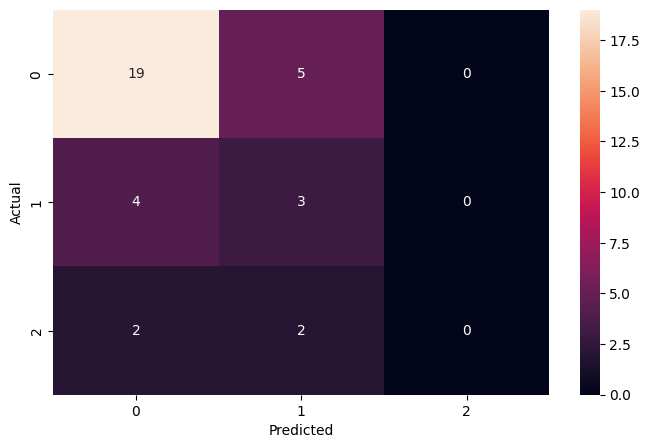

In [ ]:
from sklearn.metrics import (confusion_matrix, accuracy_score, f1_score, ConfusionMatrixDisplay, classification_report)
# Menampilkan Confusion Matrix Decision Tree
cm_displayDT=ConfusionMatrixDisplay(confusion_matrix=CMDT)
print('Confusion matrix for Decision Tree\n',CMDT)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predictionDT), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Naive Bayes

In [ ]:
# Naive Bayes
print("Naive Bayes")
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_predictionNB = gaussian.predict(X_test)
accuracy_nb = round(accuracy_score(y_test, y_predictionNB)* 100, 2)
acc_gaussianNB = round(gaussian.score(X_train, y_train)* 100, 2)
print("Prediksi Naive Bayes : ", y_predictionNB)

Naive Bayes
Prediksi Naive Bayes :  [0 1 0 0 0 1 1 1 1 0 0 0 1 2 2 1 0 0 0 0 2 1 0 0 0 1 1 0 0 1 0 2 0 0 0]


In [ ]:
# Confusion Matrix Naive Bayes
CMNB = confusion_matrix(y_test, y_predictionNB)
accuracyNB = accuracy_score(y_test, y_predictionNB)
precisionNB = precision_score(y_test, y_predictionNB, average='macro')
recallNB = recall_score(y_test, y_predictionNB, average='macro')
f1NB = f1_score(y_test, y_predictionNB, average='macro')

TNNB = CMNB[1][1] * 1.0
FNNB = CMNB[1][0] * 1.0
TPNB = CMNB[0][0] * 1.0
FPNB = CMNB[0][1] * 1.0
total = TNNB + TPNB + FPNB + FNNB
sensitivityNB = TNNB / (TNNB + FPNB)* 100
specificityNB = TPNB / (TPNB + FNNB)* 100

print("Akurasi Naive Bayes: ", accuracyNB * 100, "%")
print("Recall Naive Bayes: ", recallNB*100, "%")
print("Precision Naive Bayes: ", + precisionNB)

Akurasi Naive Bayes:  60.0 %
Recall Naive Bayes:  53.17460317460318 %
Precision Naive Bayes:  0.5242424242424243


Confusion matrix for Naive Bayes
 [[16  6  2]
 [ 4  3  0]
 [ 0  2  2]]


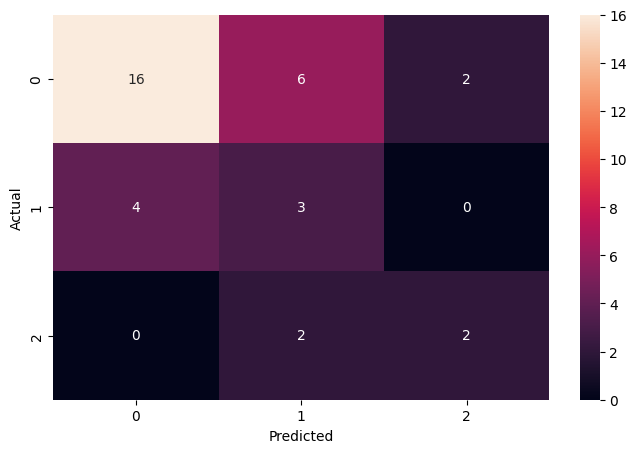

In [ ]:
# Menampilkan Confusion Matrix Naive Bayes
cm_displayNB=ConfusionMatrixDisplay(confusion_matrix=CMNB)
print('Confusion matrix for Naive Bayes\n',CMNB)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predictionNB), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Random Forest

In [ ]:
# Random Forest
print("Random Forest")
Forest = RandomForestClassifier(random_state=0)
Forest.fit(X_train, y_train)
y_predictionRF = Forest.predict(X_test)
accuracy_RF = round(accuracy_score(y_test, y_predictionRF)* 100, 2)
acc_DecisionRF = round(Forest.score(X_train, y_train)* 100, 2)
print("Prediksi Random Forest : ", y_predictionRF)

Random Forest
Prediksi Random Forest :  [0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1]


In [ ]:
# Confusion Matrix Random Forest
CMRF = confusion_matrix(y_test, y_predictionRF)
accuracyRF = accuracy_score(y_test, y_predictionRF)
precisionRF = precision_score(y_test, y_predictionRF, average='macro')
recallRF = recall_score(y_test, y_predictionRF, average='macro')
f1RF = f1_score(y_test, y_predictionRF, average='macro')

TNRF = CMRF[1][1] * 1.0
FNRF = CMRF[1][0] * 1.0
TPRF = CMRF[0][0] * 1.0
FPRF = CMRF[0][1] * 1.0
total = TNRF + TPRF + FPRF + FNRF
sensitivityRF = TNRF / (TNRF + FPRF)* 100
specificityRF = TPRF / (TPRF + FNRF)* 100

print("Akurasi Random Forest: ", accuracyRF * 100, "%")
print("Recall Random Forest: ", recallRF*100, "%")
print("Precision Random Forest: ", + precisionRF)

Akurasi Random Forest:  62.857142857142854 %
Recall Random Forest:  40.67460317460317 %
Precision Random Forest:  0.35333333333333333


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix for Random Forest
 [[19  5  0]
 [ 4  3  0]
 [ 2  2  0]]


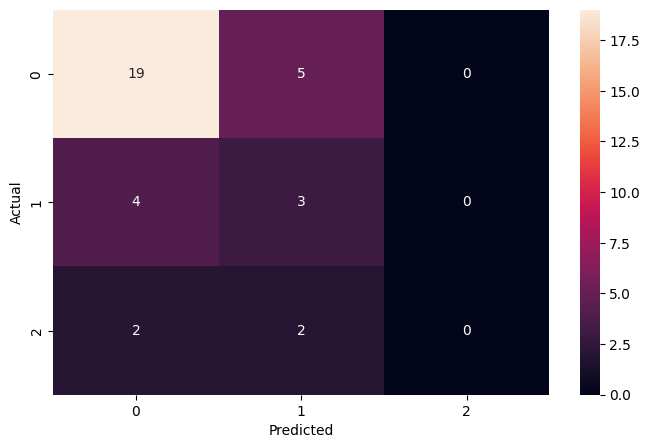

In [ ]:
# Menampilkan Confusion Matrix Random Forest
cm_displayRF=ConfusionMatrixDisplay(confusion_matrix=CMRF)
print('Confusion matrix for Random Forest\n',CMRF)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predictionRF), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()